# TASK 5

# Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

# Step 1: Load and Inspect the Dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

file_path = 'NYC Accidents 2020.csv'
data = pd.read_csv(file_path)
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [41]:
print(data.columns)


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


# Step 2: Data Cleaning

In [47]:
# Data Cleaning
data.dropna(subset=['LATITUDE', 'LONGITUDE', 'CRASH TIME', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2'], inplace=True)


# Convert Time Columns to Proper Format
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M:%S')

# Convert Date Column to Datetime Format (if necessary)
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], errors='coerce')
print(data['CRASH TIME'].head())


0   1900-01-01 15:40:00
1   1900-01-01 21:00:00
3   1900-01-01 00:00:00
4   1900-01-01 17:10:00
5   1900-01-01 03:29:00
Name: CRASH TIME, dtype: datetime64[ns]


# Step 3: Analyze Key Factors

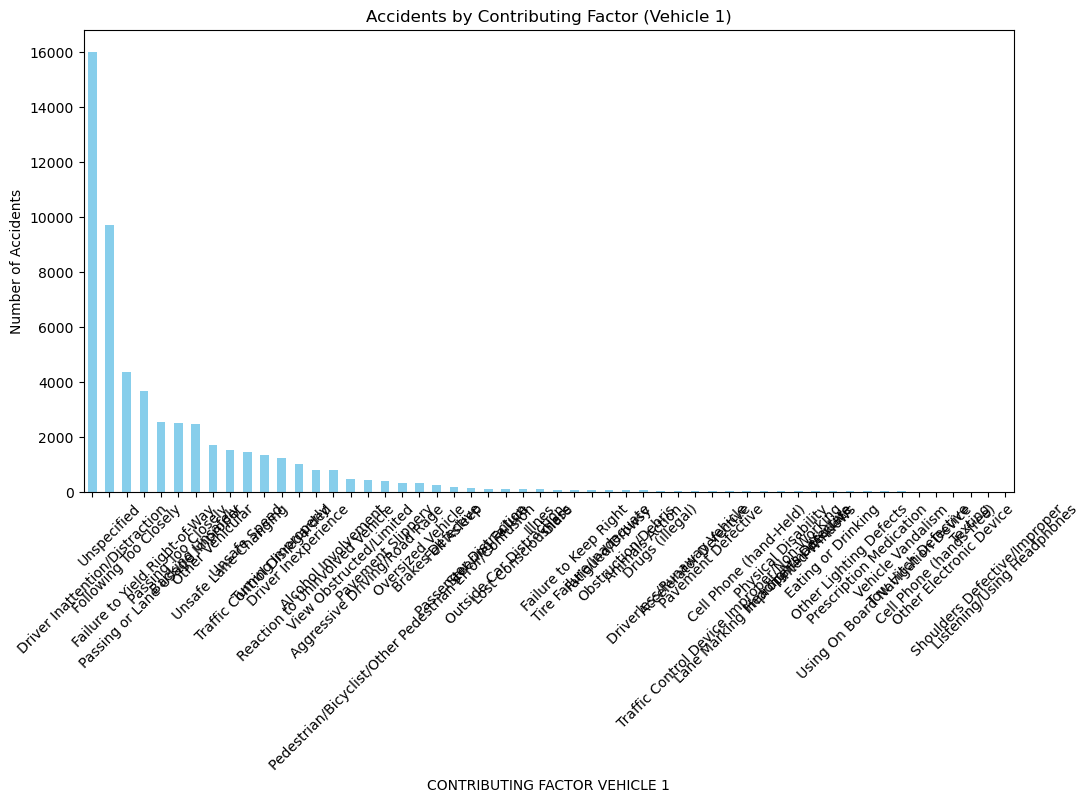

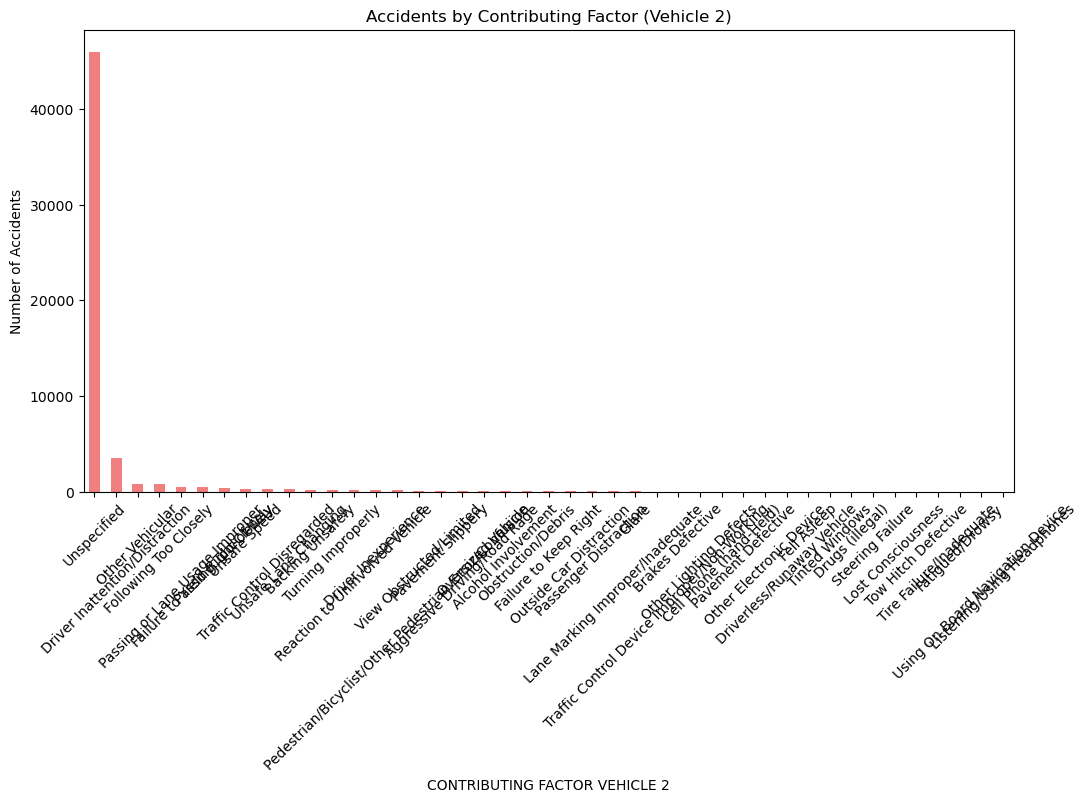

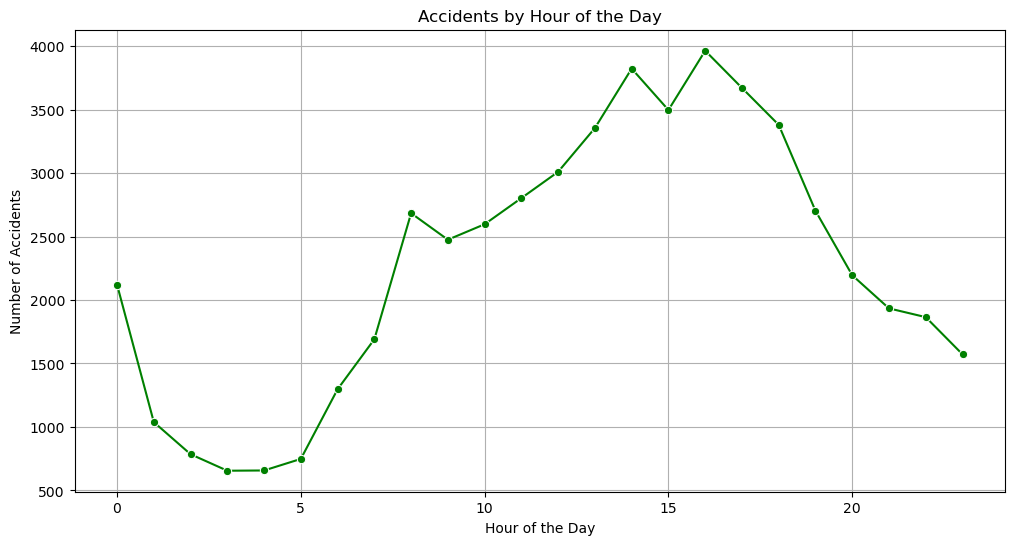

In [55]:
# Analyze Accidents Based on Contributing Factors

# Contributing Factor 1 (CONTRIBUTING FACTOR VEHICLE 1)
vehicle_factor_accidents = data.groupby('CONTRIBUTING FACTOR VEHICLE 1')['CRASH TIME'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
vehicle_factor_accidents.plot(kind='bar', color='skyblue')
plt.title('Accidents by Contributing Factor (Vehicle 1)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Contributing Factor 2 (CONTRIBUTING FACTOR VEHICLE 2)
vehicle_factor_2_accidents = data.groupby('CONTRIBUTING FACTOR VEHICLE 2')['CRASH TIME'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
vehicle_factor_2_accidents.plot(kind='bar', color='lightcoral')
plt.title('Accidents by Contributing Factor (Vehicle 2)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Analyze Accidents by Hour of the Day
data['CRASH_HOUR'] = data['CRASH TIME'].dt.hour
hourly_accidents = data.groupby('CRASH_HOUR')['CRASH TIME'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values, marker='o', color='green')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

# Step 4: Identify Accident Hotspots

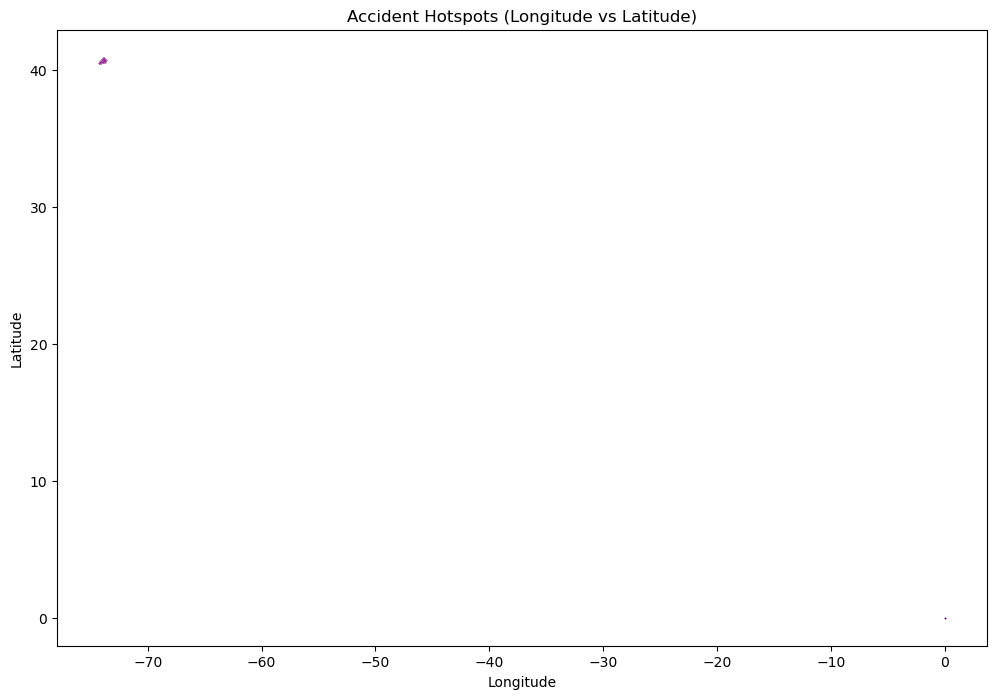

In [57]:
# Visualize Accident Hotspots (Latitude vs. Longitude)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['LONGITUDE'], y=data['LATITUDE'], alpha=0.5, color='purple', s=1)
plt.title('Accident Hotspots (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
